<a href="https://colab.research.google.com/github/robd123/AML/blob/main/CV/digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from datetime import datetime

In [21]:
which = 3
uut_file = 'numbers'
print( 'input data: ', out_file )
class_names = [ '0', '1', '2', '3', '4', '5', '6', '7', '8', '9' ]
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
channels = 1  #gray=1; rgb=3

input data:  numbers


In [158]:
accuracy_scores = list()

first 25 training images (as gray data)


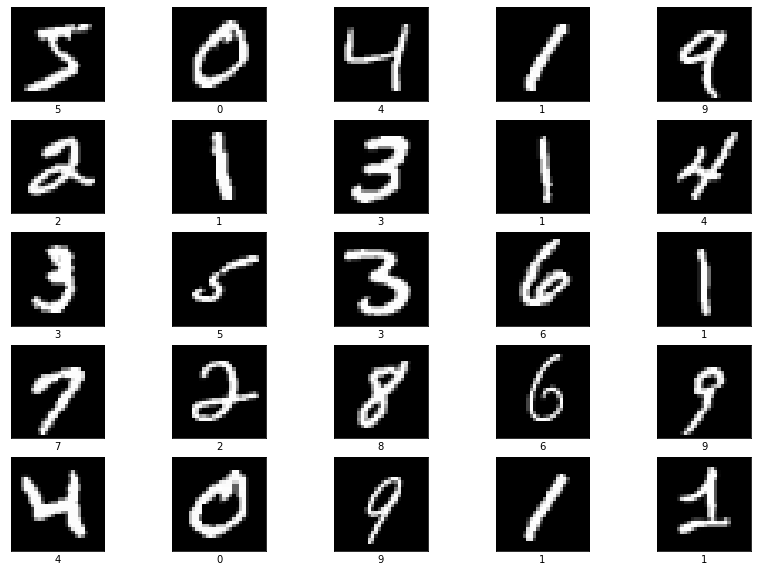

In [22]:
print( 'first 25 training images (as gray data)' )
plt.figure( figsize=(14, 10), num='first 25 training images' )
plt.title( 'first 25 training images (shown as gray data' )
for i in range( 25 ):
    plt.subplot( 5, 5, i+1 )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.imshow( train_images[i], cmap=plt.cm.gray, interpolation='nearest' )
    plt.xlabel( class_names[int(train_labels[i])] )
plt.show()

[  0   0   0   0   0   0 164 253 253 253 253 253 253 255 253 253 253 253
 253 253  99   0   0   0   0   0   0   0]


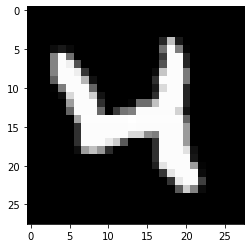

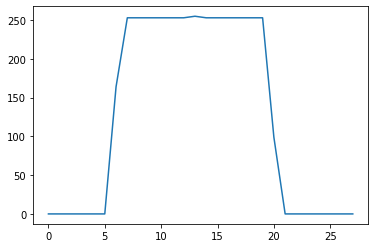

[  0   0   0   0   0   0   0   0   0   0   0   0 169 254 253 169   0   0
   0   0   0   0   0   0   0   0   0   0]


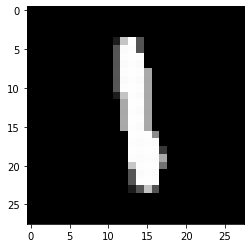

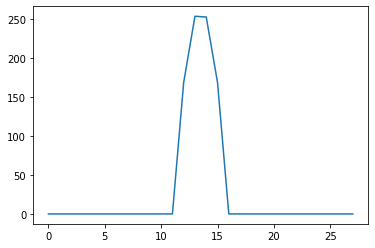

In [23]:
if channels == 1:  # 1 == gray
    i = 20  #image 20
    rows = len( train_images[i] )
    line = train_images[i][rows//2]
    print( line )
    plt.imshow( train_images[i], cmap=plt.cm.gray, interpolation='nearest' )
    plt.show()
    plt.plot( line )
    plt.show()

    i = 200  #image 200
    rows = len( train_images[i] )
    line = train_images[i][rows//2]
    print( line )
    plt.imshow( train_images[i], cmap=plt.cm.gray, interpolation='nearest' )
    plt.show()
    plt.plot( line )
    plt.show()

first 25 training images (as binary data)


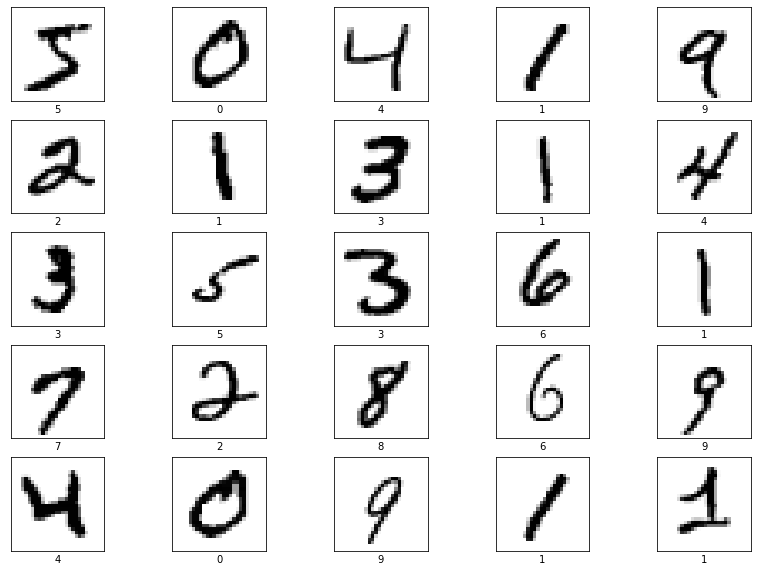

In [24]:
#show first 25 training images (as binary data)
print( 'first 25 training images (as binary data)' )
plt.figure( figsize=(14, 10), num='first 25 training images' )
plt.title( 'first 25 training images (shown as binary data' )
for i in range( 25 ):
    plt.subplot( 5, 5, i+1 )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.imshow( train_images[i], cmap=plt.cm.binary, interpolation='nearest' )
    plt.xlabel( class_names[int(train_labels[i])] )
plt.show()


In [128]:
X = np.concatenate((train_images, test_images), axis = 0)
Y = np.concatenate((train_labels, test_labels), axis = 0)

print(X.shape)
print(Y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

#Keep these since they are used later.  Reassign them to the new randomly split data
train_images = x_train
train_labels = y_train
test_images = x_test
test_labels = y_test

print( "# of training images and their size:", train_images.shape       )
print( "# of training labels and their size:", train_labels.shape, "\n" )

print( "# of testing images and their size:",  test_images.shape        )
print( "# of testing labels and their size:",  test_labels.shape        )

(70000, 28, 28)
(70000,)
# of training images and their size: (56000, 28, 28)
# of training labels and their size: (56000,) 

# of testing images and their size: (14000, 28, 28)
# of testing labels and their size: (14000,)


[1406. 1559. 1385. 1404. 1339. 1242. 1392. 1520. 1347. 1406.]


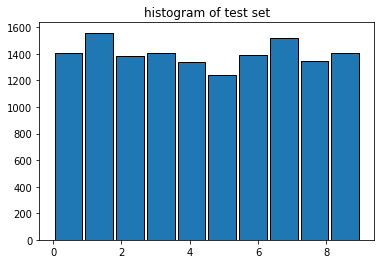

In [59]:
plt.title( 'histogram of test set' )
out = plt.hist( test_labels, ec='black', rwidth=0.9 )
print( out[0] )


[5497 6318 5605 5737 5485 5071 5484 5773 5478 5552]


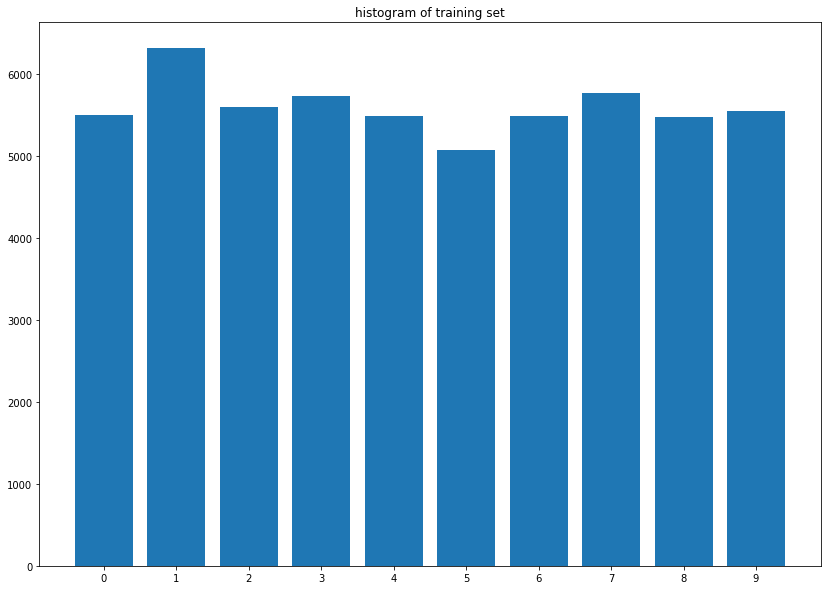

In [60]:
h = np.histogram( train_labels, len(class_names) )[0]
print( h )
plt.figure( figsize=(14,10) )
plt.title( 'histogram of training set' )
plt.bar( class_names, h )
plt.show()

[1406 1559 1385 1404 1339 1242 1392 1520 1347 1406]


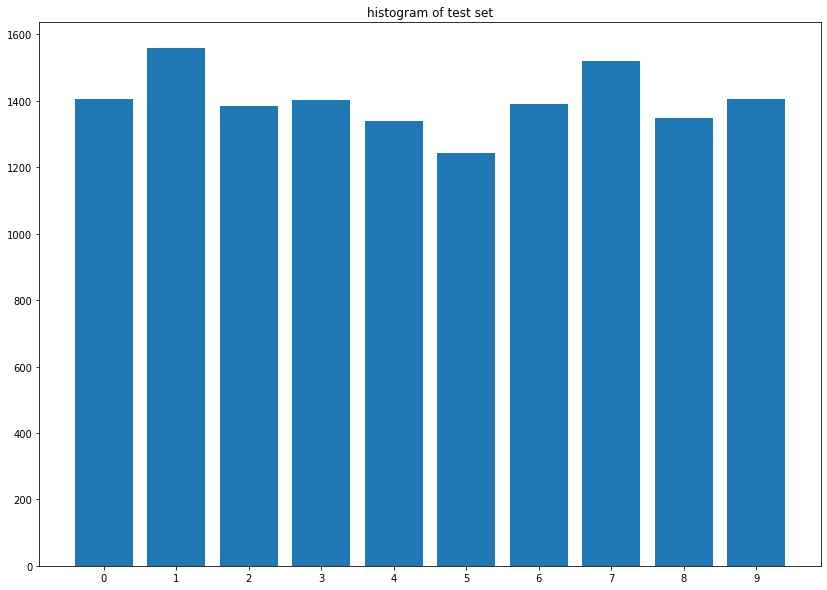

In [127]:
h = np.histogram( test_labels, len(class_names) )[0]
print( h )
plt.figure( figsize=(14,10) )
plt.title( 'histogram of test set' )
plt.bar( class_names, h )
plt.show()


In [130]:
img_rows    = x_train.shape[1]
img_cols    = x_train.shape[2]
input_shape = (img_rows, img_cols, channels)    #channels = 1 for gray (3 for color/rgb)

t1 = np.min( x_train )
t2 = np.min( x_test )
mn = np.min( [t1, t2] )

t1 = np.max( x_train )
t2 = np.max( x_test )
mx = np.min( [t1, t2] )

print( 'rows =', img_rows )
print( 'cols =', img_cols )
print( 'channels =', channels, '\n' )
print( 'min =', mn )
print( 'max =', mx )

rows = 28
cols = 28
channels = 1 

min = 0.0
max = 255.0


In [131]:
print( '# of training images: ', len(x_train) )
print( 'shape before: ', x_train.shape )

#prep training images
x_train = x_train.reshape( x_train.shape[0], img_rows, img_cols, channels )
x_train = x_train.astype( 'float32' )

assert mx == 255, "check range of data values"
x_train /= 255.0  #normalize

print( 'shape after: ', x_train.shape )

"""### prep testing"""

print( '# of testing images: ', len(x_test) )
print( 'shape before: ', x_test.shape )


# of training images:  56000
shape before:  (56000, 28, 28, 1)
shape after:  (56000, 28, 28, 1)
# of testing images:  14000
shape before:  (14000, 28, 28)


In [ ]:
#prep testing images
x_test = x_test.reshape( x_test.shape[0], img_rows, img_cols, channels )
x_test = x_test.astype( 'float32' )
assert mx == 255, "check range of data values"
x_test /= 255.0  #normalize

In [65]:
print( 'create new model' )
print( 'input shape: ', input_shape )
model = keras.Sequential()
model.add( keras.layers.Flatten( input_shape=input_shape ) )
model.add( keras.layers.Dense( 128,              activation='relu'    ) )
model.add( keras.layers.Dense( len(class_names), activation='softmax' ) )
model.compile( optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'] )

model.summary()

create new model
input shape:  (28, 28, 1)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


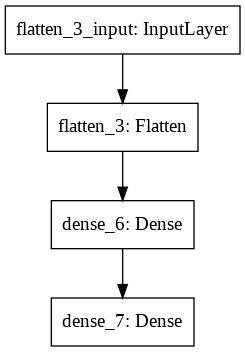

In [66]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96 )


In [67]:
print( '\ntesting all test images (before any training) ...' )
test_loss, test_acc = model.evaluate( x_test, y_test )
print( "loss=" + str(test_loss) + ", test acc=" + str(test_acc) + "\n" )

# Define the Keras TensorBoard callback.
logdir = "logs/fit/" + datetime.now().strftime( "%Y%m%d-%H%M%S" )
tensorboard_callback = keras.callbacks.TensorBoard( log_dir=logdir )


testing all test images (before any training) ...
438/438 [==============================] - 1s 1ms/step - loss: 2.4793 - accuracy: 0.0818
loss=2.480217933654785, test acc=0.08485714346170425



In [156]:
print( "training ... \n" )
ep = 100
h = model.fit( x_train, y_train, epochs=ep, callbacks=[tensorboard_callback] )  #randomizes by default

training ... 

Epoch 1/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0348 - accuracy: 0.9902
Epoch 2/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0211 - accuracy: 0.9938
Epoch 3/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0157 - accuracy: 0.9954
Epoch 4/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0139 - accuracy: 0.9958
Epoch 5/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0106 - accuracy: 0.9969
Epoch 6/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0092 - accuracy: 0.9973
Epoch 7/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0082 - accuracy: 0.9974
Epoch 8/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0078 - accuracy: 0.9974
Epoch 9/100
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0064 - accuracy: 0.9980
Epoch 10/100
1750/1750 [==============================] - 

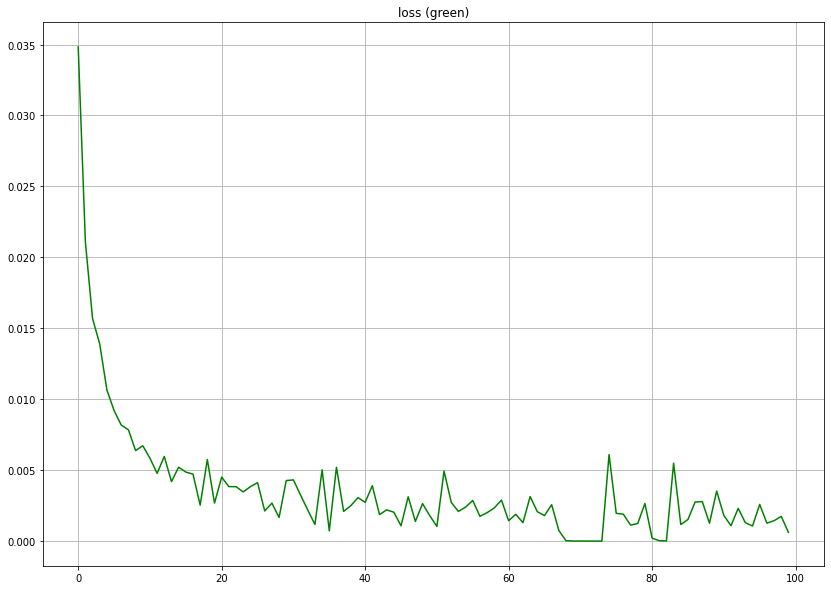

loss: [0.03483220189809799, 0.0210886113345623, 0.015693344175815582, 0.013890936970710754, 0.010648014955222607, 0.009201845154166222, 0.008181038312613964, 0.007842626422643661, 0.006381785962730646, 0.006720993667840958, 0.0058470191434025764, 0.004774394910782576, 0.005967587698251009, 0.004192615859210491, 0.005207887850701809, 0.004865429364144802, 0.004721056204289198, 0.0025358579587191343, 0.0057503413408994675, 0.002679275581613183, 0.004509956110268831, 0.003840800141915679, 0.003835741663351655, 0.00346750533208251, 0.003835827112197876, 0.004121649544686079, 0.002123228507116437, 0.0026788010727614164, 0.001662793685682118, 0.004266229923814535, 0.004313234239816666, 0.00324044656008482, 0.0021899447310715914, 0.0011713450076058507, 0.005023806355893612, 0.0007256863173097372, 0.005204285029321909, 0.002093774499371648, 0.002498510293662548, 0.003064944641664624, 0.0027311290614306927, 0.003901600604876876, 0.0018666815012693405, 0.0022031276021152735, 0.002034991979598999

In [159]:
#report and plot loss
plt.figure( figsize=(14,10) )
plt.grid();  plt.title( 'loss (green)' );       
plt.plot( h.history['loss'],     'g' ); 
plt.show()
print( "loss:", h.history["loss"] )

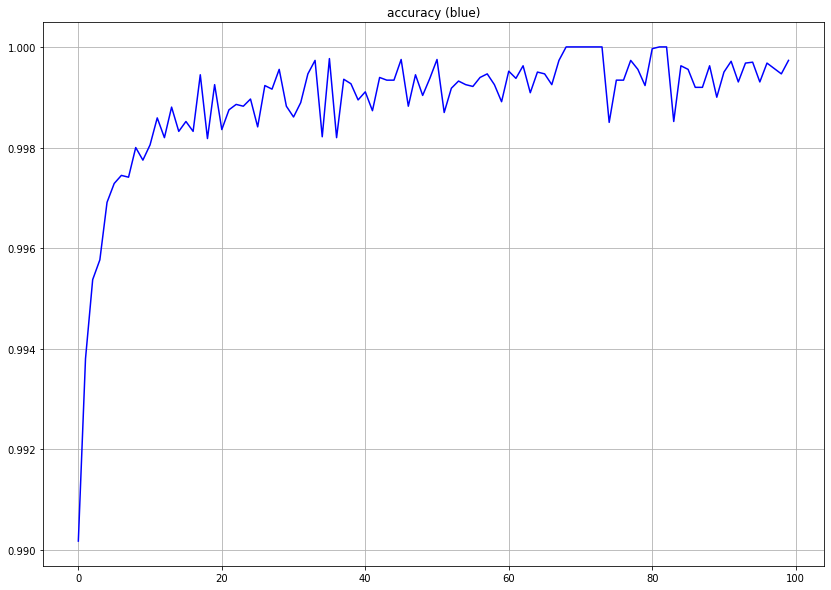

accuracy: [0.9901785850524902, 0.9938035607337952, 0.9953749775886536, 0.9957678318023682, 0.9969106912612915, 0.9972857236862183, 0.9974464178085327, 0.9974107146263123, 0.9980000257492065, 0.9977499842643738, 0.9980535507202148, 0.998589277267456, 0.9981964230537415, 0.9988035559654236, 0.9983214139938354, 0.9985178709030151, 0.9983214139938354, 0.999446451663971, 0.9981785416603088, 0.9992499947547913, 0.9983571171760559, 0.9987499713897705, 0.9988571405410767, 0.9988214373588562, 0.9989643096923828, 0.998410701751709, 0.9992321133613586, 0.9991607069969177, 0.9995535612106323, 0.9988214373588562, 0.9986071586608887, 0.9988928437232971, 0.9994642734527588, 0.9997321367263794, 0.9982143044471741, 0.9997678399085999, 0.9981964230537415, 0.9993571639060974, 0.9992678761482239, 0.9989464282989502, 0.9991071224212646, 0.9987321496009827, 0.9993928670883179, 0.9993392825126648, 0.9993392825126648, 0.999750018119812, 0.9988214373588562, 0.999446451663971, 0.9990357160568237, 0.999374985694

In [160]:
#report accuracy
plt.figure( figsize=(14,10) )
plt.grid();  plt.title( 'accuracy (blue)'   );
plt.plot( h.history['accuracy'], 'b' ); 
plt.show()
print( "accuracy:", h.history["accuracy"] )

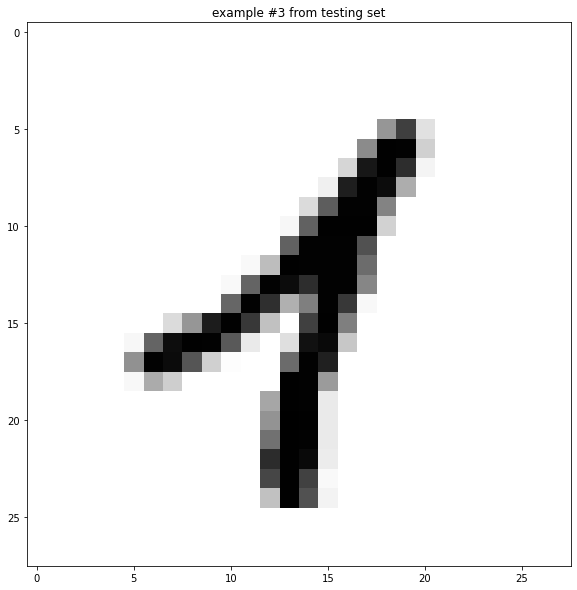

In [71]:
# show a sample test image
plt.figure( figsize=(14,10) )
plt.title( 'example #' + str(which) + ' from testing set' )
plt.imshow( test_images[which], cmap=plt.cm.binary, interpolation='nearest' )
plt.grid( False )
plt.draw()
plt.show()

In [72]:
#show sample prediction
print( 'actual class for test #', which, ':', test_labels[which], class_names[test_labels[which]] )
#get the image from the test dataset
img = x_test[ which ]
#add the image to a batch where it's the only member
img = ( np.expand_dims(img, 0) )
prediction = model.predict( img )
print( 'prediction vector for test image #' + str(which) + ':', prediction[0] )
print( 'subscript of maximal prediction:', np.argmax(prediction[0]), class_names[np.argmax(prediction[0])] )

actual class for test # 3 : 1 1
prediction vector for test image #3: [5.1761798e-08 4.7477904e-01 1.3842501e-06 5.0316859e-05 1.1434578e-01
 4.8917336e-06 5.1197094e-07 4.1053581e-01 2.7729000e-04 4.8625061e-06]
subscript of maximal prediction: 1 1


# First Prediction

first 120 test images (errors in parens)


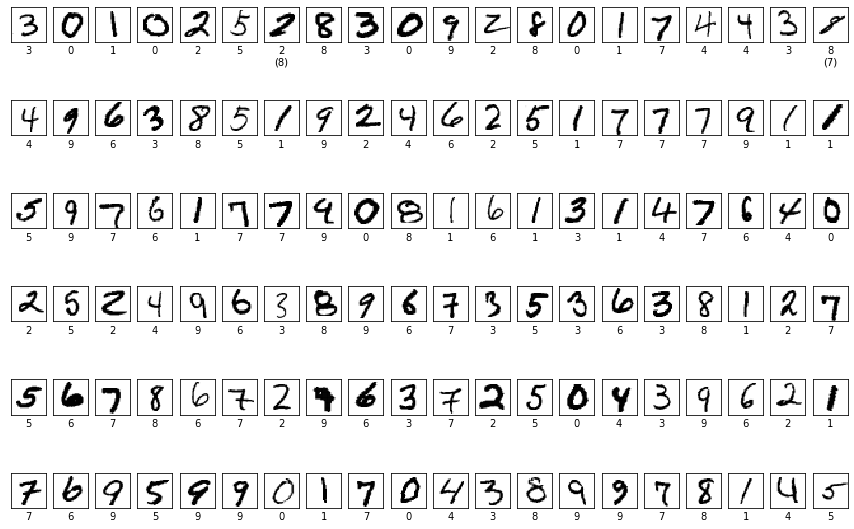

In [157]:
#show first N=RxC test images
R =  6
C = 20
print( 'first ' + str(R*C) + ' test images (errors in parens)' )
plt.figure( figsize=(15, 10), num='first ' + str(R*C) + ' test images' )
plt.title( 'test images' )
for i in range( R*C ):
    img = x_test[i]
    img = ( np.expand_dims(img, 0) )
    prediction = model.predict( img )
    prediction = class_names[ np.argmax(prediction[0]) ]
    plt.subplot( R, C, i+1 )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.imshow( test_images[i], cmap=plt.cm.binary, interpolation='nearest' )
    if class_names[int(test_labels[i])] == prediction:
        plt.xlabel( class_names[int(test_labels[i])] )
    else:
        plt.xlabel( class_names[int(test_labels[i])] + "\n(" + prediction + ")" )
plt.savefig( out_file+'-first120.png' )
plt.show()

[Text(159.0, 0.5, 'Actual'), Text(0.5, 69.0, 'Predicted')]

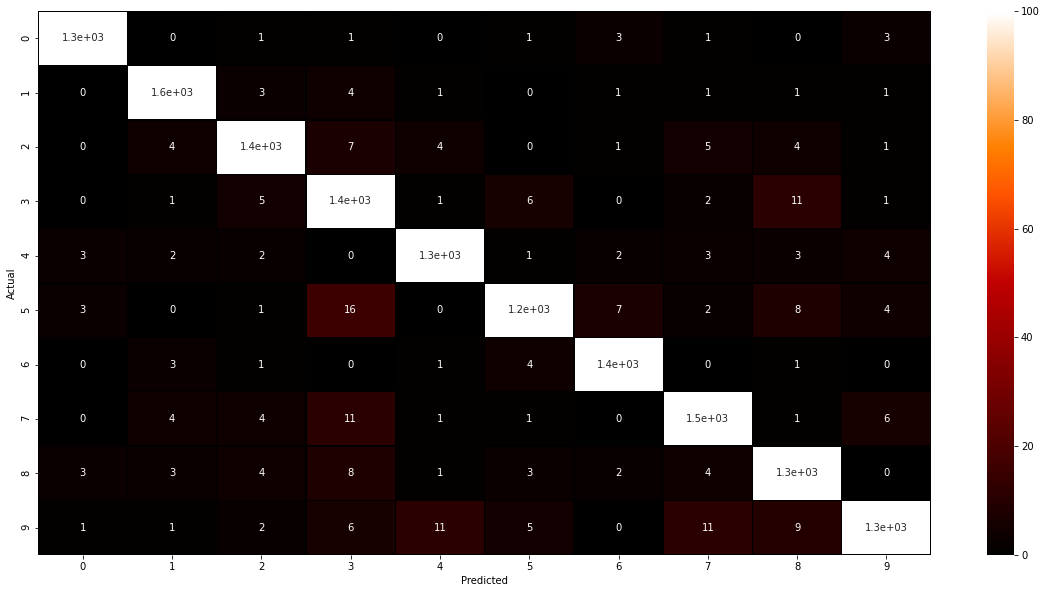

In [184]:
y_pred = np.argmax(model.predict(x_test), axis=-1)
accuracy_scores.append({'1': accuracy_score(y_test, y_pred)})
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(cm, cmap='gist_heat', annot=True, xticklabels=class_names, yticklabels=class_names, vmax=100, vmin=0, linewidths=.3, linecolor='black')
heatmap.set(xlabel="Predicted", ylabel = "Actual")

In [185]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1306
           1       0.99      0.99      0.99      1596
           2       0.98      0.98      0.98      1442
           3       0.96      0.98      0.97      1449
           4       0.99      0.99      0.99      1346
           5       0.98      0.97      0.98      1261
           6       0.99      0.99      0.99      1373
           7       0.98      0.98      0.98      1488
           8       0.97      0.98      0.98      1344
           9       0.99      0.97      0.98      1395

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



In [163]:
bad = [y_pred[i] for i in range(len(y_pred)) if y_pred[i] != y_test[i]]
good = [y_pred[i] for i in range(len(y_pred)) if y_pred[i] == y_test[i]]
print(len(good))
print(len(bad))

13752
248


[10 18 23 53 20 21 16 29 38 20]


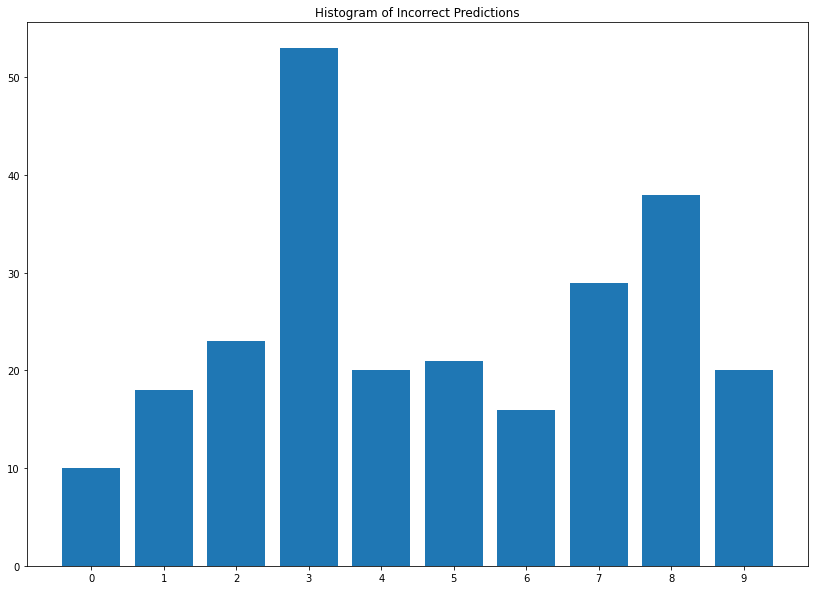

In [164]:
h_bad = np.histogram( bad, len(class_names) )[0]
print( h_bad )
plt.figure( figsize=(14,10) )
plt.title( 'Histogram of Incorrect Predictions' )
plt.bar( class_names, h_bad )
plt.show()

[1296 1584 1416 1422 1326 1220 1363 1460 1316 1349]


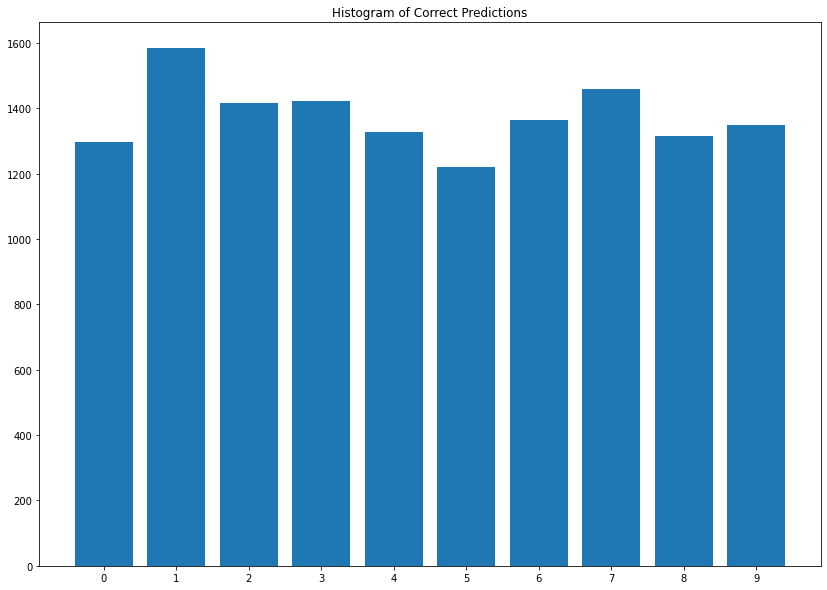

In [165]:
h_good = np.histogram( good, len(class_names) )[0]
print( h_good )
plt.figure( figsize=(14,10) )
plt.title( 'Histogram of Correct Predictions' )
plt.bar( class_names, h_good )
plt.show()

[1.1432926829268293, 1.4962593516209477, 4.758713136729223, 6.828627708470124, 0.8416220351951033, 1.941747572815534, 1.7316017316017316, 2.572782667569397, 3.7202380952380953, 1.1372251705837755]


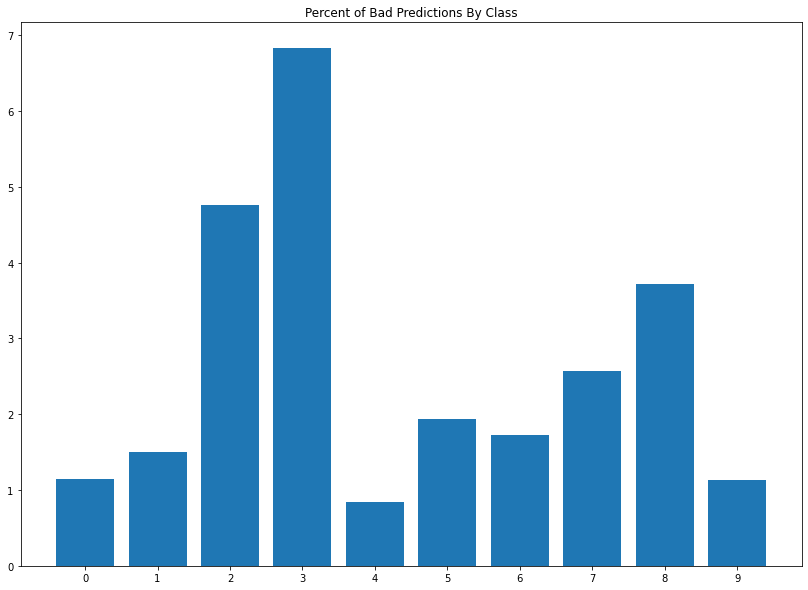

In [183]:
pct_bad = [(h_bad[i]*100/(h_bad[i] +  h_good[i])) for i in range(len(h_good))]
print(pct_bad)
plt.figure( figsize=(14,10) )
plt.title( 'Percent of Bad Predictions By Class' )
plt.bar( class_names, pct_bad )
plt.show()

# Second Prediction - Low Noise

In [166]:
np.random.seed(17)

zeroes = np.zeros((len(x_test), img_rows, img_cols, 1))
ones = zeroes + 1
noise = np.random.normal(0, .1, x_test.shape)

noisy_x_test = x_test + noise
noisy_x_test = np.minimum(noisy_x_test, ones)
noisy_x_test = np.maximum(noisy_x_test, zeroes)

# Reshape and multiply by 255 to get images for display
noisy_train_images = noisy_x_test.reshape(len(x_test), img_rows, img_cols)*255

first 120 test images (errors in parens)


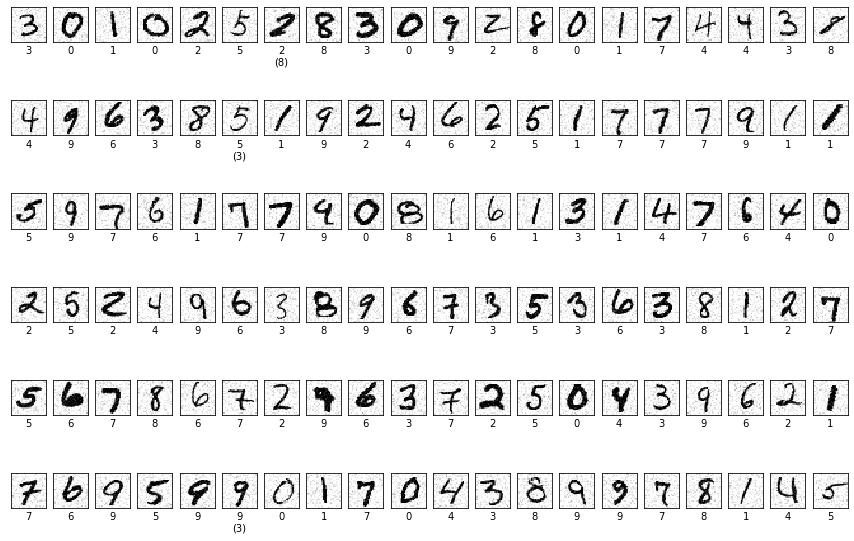

In [167]:
#show first N=RxC test images
R =  6
C = 20
print( 'first ' + str(R*C) + ' test images (errors in parens)' )
plt.figure( figsize=(15, 10), num='first ' + str(R*C) + ' test images' )
plt.title( 'test images' )
for i in range( R*C ):
    img = noisy_x_test[i]
    img = ( np.expand_dims(img, 0) )
    prediction = model.predict( img )
    prediction = class_names[ np.argmax(prediction[0]) ]
    plt.subplot( R, C, i+1 )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.imshow( noisy_train_images[i], cmap=plt.cm.binary, interpolation='nearest' )
    if class_names[int(test_labels[i])] == prediction:
        plt.xlabel( class_names[int(test_labels[i])] )
    else:
        plt.xlabel( class_names[int(test_labels[i])] + "\n(" + prediction + ")" )
plt.savefig( out_file+'-first120.png' )
plt.show()

[Text(159.0, 0.5, 'Actual'), Text(0.5, 69.0, 'Predicted')]

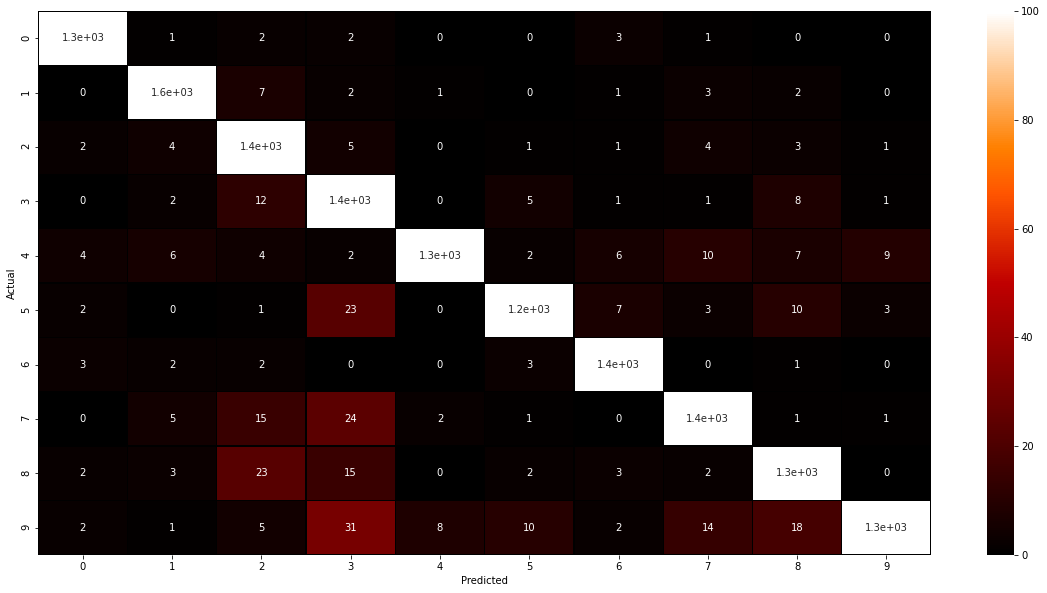

In [175]:
y_pred = np.argmax(model.predict(noisy_x_test), axis=-1)
accuracy_scores.append({'1': accuracy_score(y_test, y_pred)})
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(cm, cmap='gist_heat', annot=True, xticklabels=class_names, yticklabels=class_names, vmax=100, vmin=0, linewidths=.3, linecolor='black')
heatmap.set(xlabel="Predicted", ylabel = "Actual")

In [176]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1306
           1       0.99      0.99      0.99      1596
           2       0.95      0.99      0.97      1442
           3       0.93      0.98      0.95      1449
           4       0.99      0.96      0.98      1346
           5       0.98      0.96      0.97      1261
           6       0.98      0.99      0.99      1373
           7       0.97      0.97      0.97      1488
           8       0.96      0.96      0.96      1344
           9       0.99      0.93      0.96      1395

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



In [177]:
bad = [y_pred[i] for i in range(len(y_pred)) if y_pred[i] != y_test[i]]
good = [y_pred[i] for i in range(len(y_pred)) if y_pred[i] == y_test[i]]
print(len(good))
print(len(bad))

13624
376


[ 15  24  71 104  11  24  24  38  50  15]


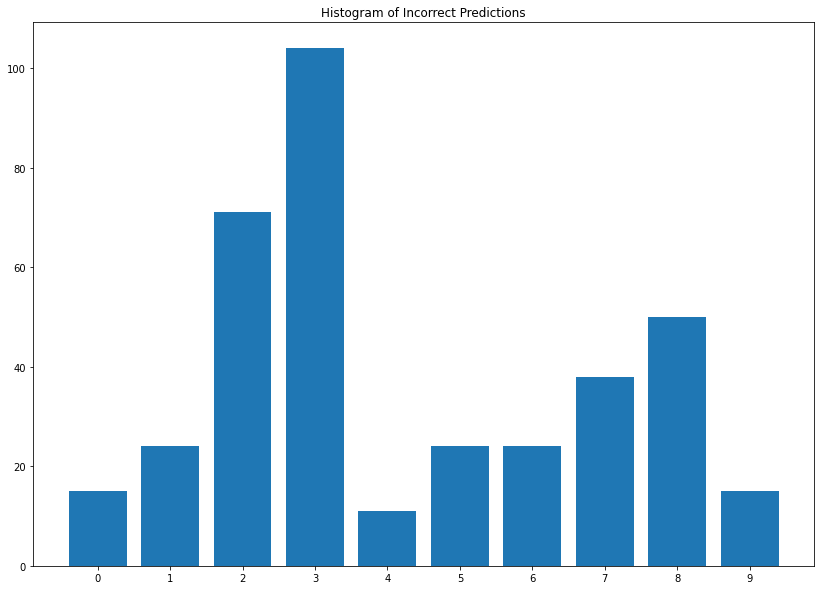

In [178]:
h_bad = np.histogram( bad, len(class_names) )[0]
plt.figure( figsize=(14,10) )
plt.title( 'Histogram of Incorrect Predictions' )
plt.bar( class_names, h_bad )
plt.show()

[1297 1580 1421 1419 1296 1212 1362 1439 1294 1304]


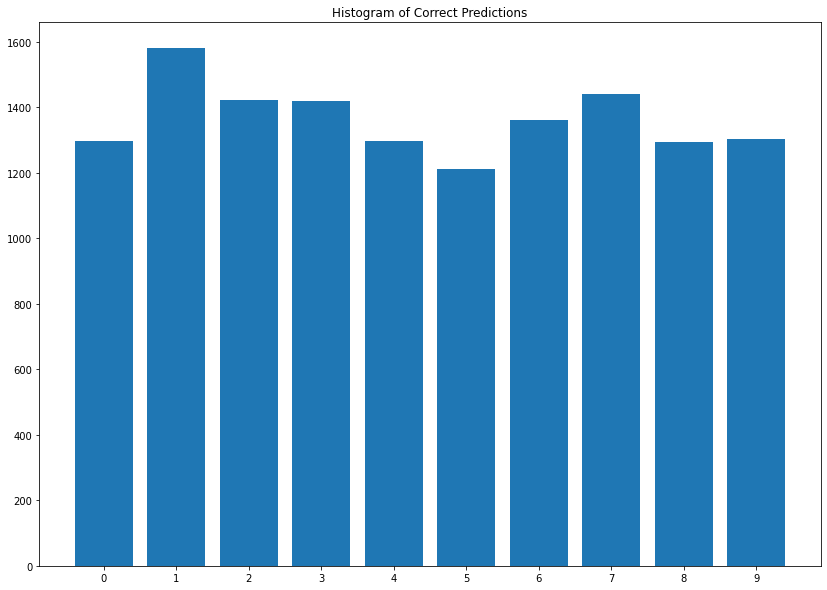

In [181]:
h_good = np.histogram( good, len(class_names) )[0]
plt.figure( figsize=(14,10) )
plt.title( 'Histogram of Correct Predictions' )
plt.bar( class_names, h_good )
plt.show()

[1.1432926829268293, 1.4962593516209477, 4.758713136729223, 6.828627708470124, 0.8416220351951033, 1.941747572815534, 1.7316017316017316, 2.572782667569397, 3.7202380952380953, 1.1372251705837755]


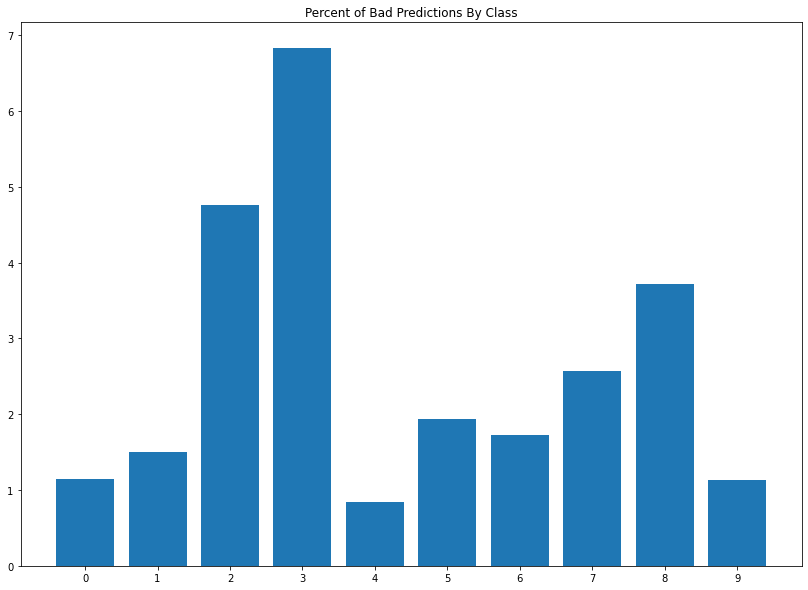

In [182]:
pct_bad = [(h_bad[i]*100/(h_bad[i] +  h_good[i])) for i in range(len(h_good))]
plt.figure( figsize=(14,10) )
plt.title( 'Percent of Bad Predictions By Class' )
plt.bar( class_names, pct_bad )
plt.show()

# Increase Noise

In [203]:
np.random.seed(17)

zeroes = np.zeros((len(x_test), img_rows, img_cols, 1))
ones = zeroes + 1

noisy_test_sets = list()
noisy_display_sets = list()

noise = np.random.normal(0, .1, x_test.shape)
noisy_x_test = x_test + noise

for i in range(0, 10):

  noisy_test_sets.append(noisy_x_test)
  noise = np.random.normal(0, .1, x_test.shape)
  # Reshape and multiply by 255 to get images for display
  noisy_display_sets.append(noisy_x_test.reshape(len(x_test), img_rows, img_cols) * 255)

  noisy_x_test = noisy_x_test + noise
  noisy_x_test = np.minimum(noisy_x_test, ones)
  noisy_x_test = np.maximum(noisy_x_test, zeroes)


In [204]:
noise_accuracy_scores = list()
noisy_predictions = list()

for test_set in noisy_test_sets:
  pred = np.argmax(model.predict(test_set), axis=-1)
  noise_accuracy_scores.append(accuracy_score(y_test, pred))
  noisy_predictions.append(pred)


In [205]:
print(noise_accuracy_scores)

[0.975, 0.9561428571428572, 0.9085, 0.8411428571428572, 0.7646428571428572, 0.6913571428571429, 0.6285, 0.5732857142857143, 0.5227142857142857, 0.48764285714285716]


first 120 test images (errors in parens)


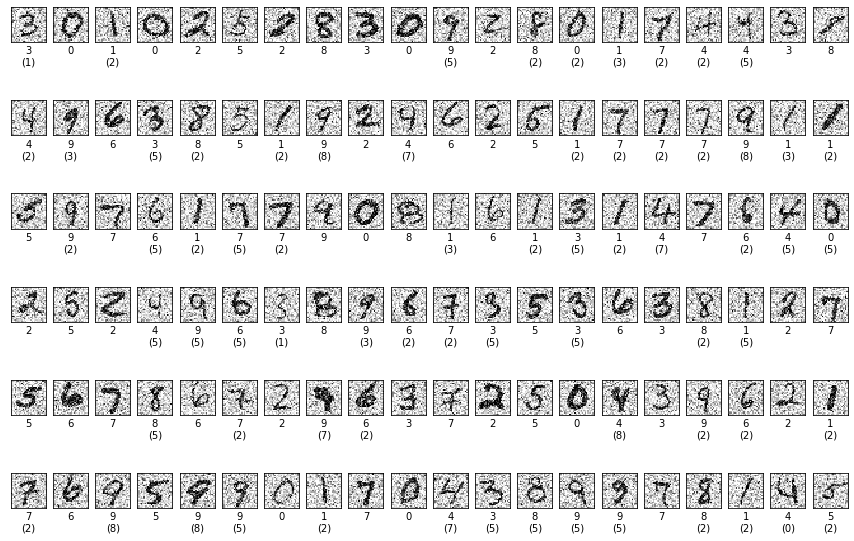

In [206]:
#show first N=RxC test images
R =  6
C = 20
print( 'first ' + str(R*C) + ' test images (errors in parens)' )
plt.figure( figsize=(15, 10), num='first ' + str(R*C) + ' test images' )
plt.title( 'test images' )
for i in range( R*C ):
    img = noisy_test_sets[9][i]
    img = ( np.expand_dims(img, 0) )
    prediction = model.predict( img )
    prediction = class_names[ np.argmax(prediction[0]) ]
    plt.subplot( R, C, i+1 )
    plt.xticks( [] )
    plt.yticks( [] )
    plt.imshow( noisy_display_sets[9][i], cmap=plt.cm.binary, interpolation='nearest' )
    if class_names[int(test_labels[i])] == prediction:
        plt.xlabel( class_names[int(test_labels[i])] )
    else:
        plt.xlabel( class_names[int(test_labels[i])] + "\n(" + prediction + ")" )
plt.savefig( out_file+'-first120.png' )
plt.show()